In [43]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import matplotlib.mlab as mlab
import matplotlib.ticker as tkr
import datetime as dt
% matplotlib inline

In [44]:
VADIR = pd.read_csv("VADIR_clean.csv")

In [45]:
VADIR.head()

,County,District,School Name,School Year,Enrollment,BEDS Code,Grade Organization,School Type,Total Incidents,Incidents w/ Weapons,...,Other Sex Offenses_nw,Other Sex Offenses_ww,Reckless Endangerment_nw,Reckless Endangerment_ww,Riot_nw,Riot_ww,Robbery_nw,Robbery_ww,Weapon Possession_nw,Weapon Possession_ww
0,Bronx,NaN,Academic Leadership Charter School,2014,376,320700860957,Elementary,Charter,2,0,...,0,0,0,0,0,0,0,0,0,0
1,Bronx,NaN,American Dream Charter School,2014,81,320700861062,NaN,Charter,12,8,...,0,0,0,0,0,0,0,0,0,0
2,Bronx,NaN,Brilla College Preparatory Charter School,2014,247,320700861014,Elementary,Charter,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Bronx,NaN,Bronx Academy Of Promise Charter School,2014,581,320900860913,Elementary,Charter,5,5,...,0,0,0,0,0,0,0,0,0,0
4,Bronx,NaN,Bronx Charter School For Better Learning,2014,470,321100860855,Elementary,Charter,49,27,...,0,0,9,0,0,0,0,0,0,0


In [46]:
VADIR.columns

Index(['County', 'District', 'School Name', 'School Year', 'Enrollment',
       'BEDS Code', 'Grade Organization', 'School Type', 'Total Incidents',
       'Incidents w/ Weapons', 'Incidents w/ Weapons.1', 'Alcohol Possession',
       'Arson', 'Assault With Serious Physical Injury_nw',
       'Assault With Serious Physical Injury_ww',
       'Assault with Physical Injury_nw', 'Assault with Physical Injury_ww',
       'Bomb Threat', 'Bomb Threat False Alarm', 'Burglary_nw', 'Burglary_ww',
       'Criminal Mischief_nw', 'Criminal Mischief_ww', 'Drug Possession',
       'Forcible Sex Offenses_nw', 'Forcible Sex Offenses_ww', 'Homicide_nw',
       'Homicide_ww', 'Intimidation, Harassment, Menacing, or Bullying_nw',
       'Intimidation, Harassment, Menacing, or Bullying_ww', 'Kidnapping_nw',
       'Kidnapping_ww', 'Larceny, or Other Theft_nw',
       'Larceny, or Other Theft_ww', 'Minor Altercations_nw',
       'Minor Altercations_ww', 'Other Disruptive Incidents',
       'Other Sex Offen

In [47]:
print(VADIR['County'].value_counts())

Bronx                 2737
Queens                2260
Brooklyn              1911
Kings                 1655
New York              1040
Manhattan              937
Richmond               478
Nyc Central Office     344
Manhatten              291
Nassau                   1
Name: County, dtype: int64


In [48]:
cleancounty = {'Bronx': 'Bronx', 'Queens': 'Queens', 'Brooklyn': 'Brooklyn', 'Kings': 'Brooklyn', 'New York': 'New York', 
               'Manhattan': 'Manhattan', 'Richmond': 'Staten Island', 'Nyc Central Office': 'Nyc Central Office', 
               'Manhatten': 'Manhattan', 'Nassau': 'Nassau', 'nan': 'nan'}

VADIR['County'] = VADIR['County'].apply(cleancounty.get)

In [49]:
print(VADIR['County'].value_counts())

Brooklyn              3566
Bronx                 2737
Queens                2260
Manhattan             1228
New York              1040
Staten Island          478
Nyc Central Office     344
Nassau                   1
Name: County, dtype: int64


In [51]:
VADIR.to_csv("VADIR_clean2.csv", index = False)

In [53]:
yearcountyoffensecount = VADIR.groupby(['School Year', 'County'], as_index=False)['Total Incidents'].count()

In [60]:
yearcountyoffensecountp = yearcountyoffensecount.pivot('School Year','County', 'Total Incidents')

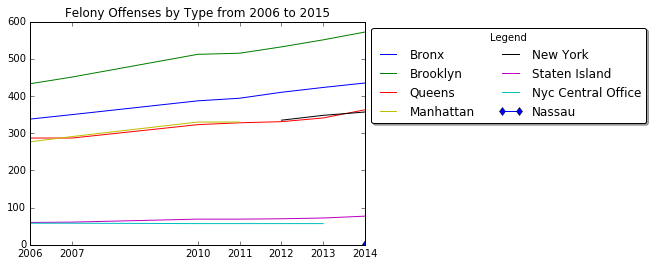

In [63]:
#wanted to see a breakout of borough offenses across years
x = yearcountyoffensecountp.index
xlabels = [int(xl) for xl in x]
ybronx = yearcountyoffensecountp["Bronx"]
ybrook = yearcountyoffensecountp["Brooklyn"]
yqueens = yearcountyoffensecountp["Queens"]
yman = yearcountyoffensecountp["Manhattan"]
yny = yearcountyoffensecountp["New York"]
ysi = yearcountyoffensecountp["Staten Island"]
ynyc = yearcountyoffensecountp["Nyc Central Office"]
yn = yearcountyoffensecountp["Nassau"]

def func(x, pos):  
   s = '{:0,d}'.format(int(x))
   return s

y_format = tkr.FuncFormatter(func) 
plt.xticks(x, xlabels)
plt.gca().yaxis.set_major_formatter(y_format)

plt.plot(x, ybronx, 'b-', label='Bronx')
plt.plot(x, ybrook, 'g-', label='Brooklyn')
plt.plot(x, yqueens, 'r-', label='Queens')
plt.plot(x, yman, 'y-', label='Manhattan')
plt.plot(x, yny, 'k-', label='New York')
plt.plot(x, ysi, 'm-', label='Staten Island')
plt.plot(x, ynyc, 'c-', label='Nyc Central Office')
plt.plot(x, yn, 'd-', label='Nassau')

plt.legend(loc="best", bbox_to_anchor=[1, 1],
           ncol=2, shadow=True, title="Legend", fancybox=True)
plt.title('Felony Offenses by Borough from 2006 to 2014')
plt.show()

#note there is no data for counties for year 2008 and 2009
#looked in the raw data and this is because County is blank for these years

In [64]:
print(VADIR['School Year'].value_counts())

2014    1805
2013    1792
2012    1735
2011    1693
2010    1678
2008    1545
2009    1531
2007    1498
2006    1453
Name: School Year, dtype: int64


In [78]:
pd.isnull(VADIR['County']).value_counts()

False    11654
True      3076
Name: County, dtype: int64

In [66]:
yearcountyoffensecountp

County,Bronx,Brooklyn,Manhattan,Nassau,New York,Nyc Central Office,Queens,Staten Island
School Year,,,,,,,,
2006,338,433,277,NaN,NaN,58,287,60
2007,350,451,291,NaN,NaN,58,287,61
2010,387,512,330,NaN,NaN,57,323,69
2011,394,515,330,NaN,NaN,57,328,69
2012,410,532,NaN,NaN,335,57,331,70
2013,423,551,NaN,NaN,348,57,341,72
2014,435,572,NaN,1,357,NaN,363,77


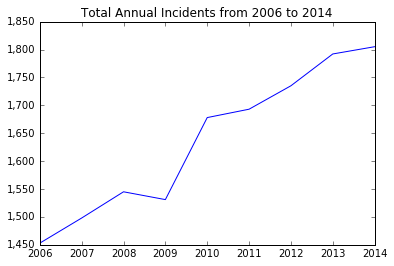

In [79]:
#decided just to do an annual total
yearcount = VADIR.groupby(['School Year'], as_index=False)['Total Incidents'].count()

x = yearcount['School Year']
xlabels = [int(xl) for xl in x]
y = yearcount["Total Incidents"]

def func(x, pos):  
   s = '{:0,d}'.format(int(x))
   return s

y_format = tkr.FuncFormatter(func) 
plt.xticks(x, xlabels)
plt.gca().yaxis.set_major_formatter(y_format)
plt.plot(x,y)
plt.title('Total Annual Incidents from 2006 to 2014')